In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head(2)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0


In [4]:
ny_df = df.loc[df['state'] == 'New York'].reset_index()

In [5]:
ny_df.drop('index', axis=1, inplace=True)
ny_df.drop('fips', axis=1, inplace=True)
ny_df.head(1)

,date,state,cases,deaths
0,2020-03-01,New York,1,0


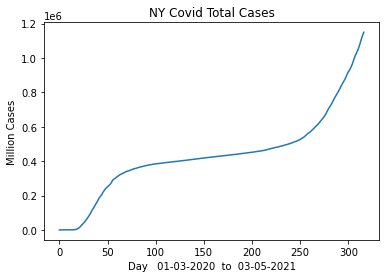

In [6]:
plt.plot(range(0, 317), ny_df['cases'])
plt.title('NY Covid Total Cases')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Million Cases')
plt.show()

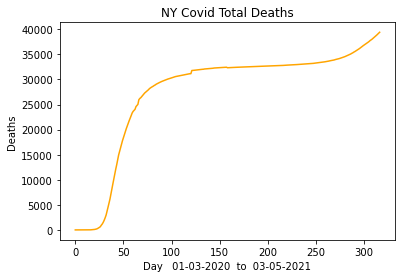

In [7]:
plt.plot(range(0, 317), ny_df['deaths'], color='orange')
plt.title('NY Covid Total Deaths')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Deaths')
plt.show()

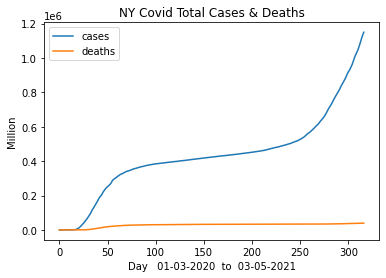

In [8]:
plt.plot(range(0, 317), ny_df['cases'], label='cases')

plt.plot(range(0, 317), ny_df['deaths'], label='deaths')

plt.title('NY Covid Total Cases & Deaths')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Million')
plt.legend()

plt.show()

In [9]:
ny_df.loc[:, 'new_cases'] = ny_df.loc[:, 'cases'].diff().fillna(ny_df.loc[:, 'cases'])

In [10]:
ny_df.head()

,date,state,cases,deaths,new_cases
0,2020-03-01,New York,1,0,1.0
1,2020-03-02,New York,1,0,0.0
2,2020-03-03,New York,2,0,1.0
3,2020-03-04,New York,11,0,9.0
4,2020-03-05,New York,22,0,11.0


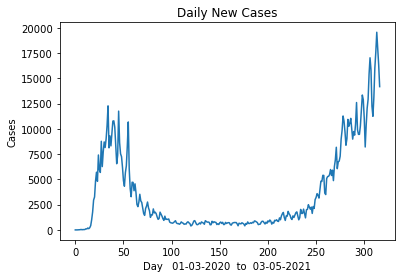

In [11]:
plt.plot(range(0, 317), ny_df['new_cases'])
plt.title('Daily New Cases')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Cases')
plt.show()

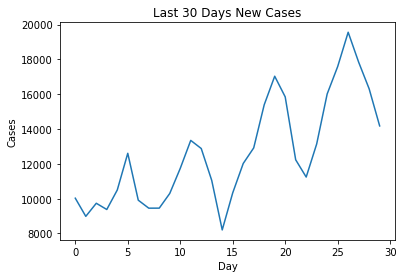

In [12]:
plt.plot(range(30), ny_df['new_cases'][-30:])
plt.title('Last 30 Days New Cases')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.show()

In [13]:
ny_df.loc[:, 'date'] = pd.to_datetime(ny_df.loc[:, 'date'])

In [14]:
ny_df['weekday'] = ny_df['date'].dt.dayofweek
ny_df.head()

,date,state,cases,deaths,new_cases,weekday
0,2020-03-01,New York,1,0,1.0,6
1,2020-03-02,New York,1,0,0.0,0
2,2020-03-03,New York,2,0,1.0,1
3,2020-03-04,New York,11,0,9.0,2
4,2020-03-05,New York,22,0,11.0,3


In [15]:
weekdays = ny_df.groupby('weekday')['new_cases'].mean().reset_index()
weekdays

,weekday,new_cases
0,0,3115.521739
1,1,3125.622222
2,2,3632.822222
3,3,3912.111111
4,4,4154.822222
5,5,4115.822222
6,6,3355.652174


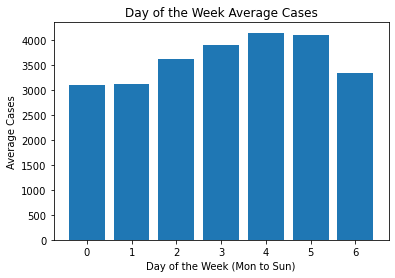

In [18]:
plt.bar(weekdays.iloc[:, 0], weekdays.iloc[:, 1])
plt.title('Day of the Week Average Cases')
plt.xlabel('Day of the Week (Mon to Sun)')
plt.ylabel('Average Cases')
plt.show()

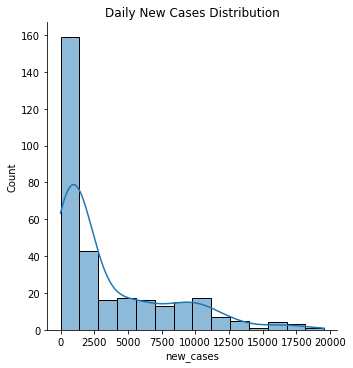

In [17]:
import seaborn as sns

sns.displot(ny_df['new_cases'], kde=True)\
.set(title='Daily New Cases Distribution')
plt.show()

# Conclusion

### We, the New Yorkers, are at the worst point of the pandemic right now!